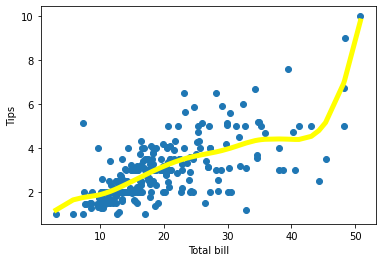

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def localWeigh(point, X, ymat, k):
    m, n = np.shape(X)
    weights = np.mat(np.eye(m))
    for i in range(m):
        diff = point - X[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*k**2))
    W = (X.T * (weights*X)).I * (X.T*(weights*ymat.T))
    return W

def localWeightReg(X,ymat,k):
    m,n = np.shape(X)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = X[i] * localWeigh(X[i],X,ymat,k)
    return ypred

def plott(X,pred):
    sortIndex = X[:,1].argsort(0)
    xsort = X[sortIndex][:,0][:,1]
    ysort = pred[sortIndex]
    plt.scatter(x,y)
    plt.plot(xsort,ysort,color="yellow",linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tips')
    plt.show()
    return

data = pd.read_csv('data10.csv')
x=data['total_bill']
y = data['tip']
xmat = np.mat(x)
ymat = np.mat(y)
size = np.shape(xmat)[1]
ones = np.mat(np.ones(size))
X=np.hstack((ones.T,xmat.T))
pred = localWeightReg(X,ymat,3)
plott(X,pred)